# Power regression

Let $\quad x \in \mathbb{R}^n\quad$ and $\quad y = b x ^ a\ ,\ \forall(a, b) \in \mathbb{R} \times \mathbb{R}^{*+}$

We have 
$$ y' = ln(y)\ =\ ln(b x ^ a) \ =\ ln(b) + ln(x^a) \ =\ a ln(x) + ln(b) \ =\ a' x' + b'$$
whit $\ a' = a\ ,\ b' = ln(b)\ ,\ x' = ln(x)$

So
$$y\ =\ e^{b'} x ^ a$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

correlation coefficient: R(x, y) = 0.8041822220346064


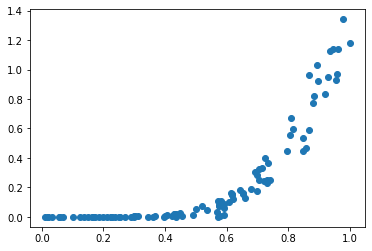

In [2]:
# Dataset
data = pd.read_csv("dataset/power.csv")
# y = b * x ^ a
X, y = data.X, data.y

# Plot the dataset
plt.scatter(X, y)

# Correlation coefficient
corrcoef = np.corrcoef(X, y)
print("correlation coefficient: R(x, y) =", corrcoef[0, 1])

correlation coefficient: R(x, y) = 0.9812608950864677


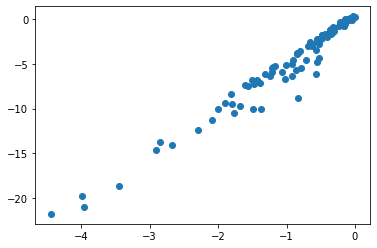

In [3]:
# Linearization of the data set
# y' = a' x' + b' | b' = ln(b), a' = a, x' = ln(x)
X, y = np.log(X), np.log(y)

# Plot the dataset
plt.scatter(X, y)

# Correlation coefficient
corrcoef = np.corrcoef(X, y)
print("correlation coefficient: R(x, y) =", corrcoef[0, 1])

a'  = 5.235204019072516
b' = 0.12153981157965199


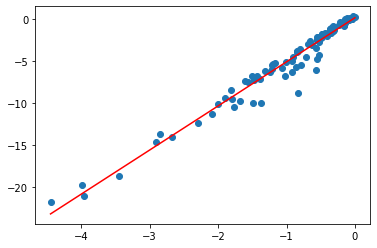

In [4]:
# Solve this linear problem

from scipy import optimize

def model(X, a, b):
    return a * X + b
    
[_a, _b], _ = optimize.curve_fit(model, X, y)
print("a'  =", _a)
print("b' =", _b)

# Plot the result
plt.scatter(X, y)
__x = np.linspace(X.min(), X.max(), X.shape[0])
# y' = a' x' + b'
_ = plt.plot(__x, _a * __x + _b, c='r')

a = 5.235204019072516
b = 1.1292343216324143


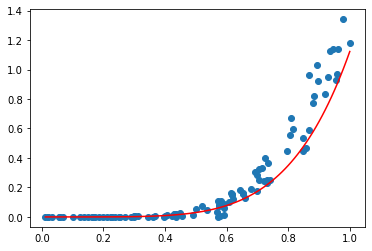

In [5]:
# Solve the nonlinear problem

# the original dataset
X, y = data.X, data.y

# b' = ln(b), a' = a  =>  b = exp(b'), a = a'
a = _a
b = np.exp(_b)
print("a =", a)
print("b =", b)

# Plot the result
plt.scatter(X, y)
__x = np.linspace(X.min(), X.max(), X.shape[0])
# y = b x ^ a
_ = plt.plot(__x, b * __x ** a, c='r')